In [1]:
import aplpy
import math
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import warnings
import spectral_cube
import pandas as pd
import scipy
import sympy
from spectral_cube import SpectralCube
warnings.filterwarnings('ignore')

In [77]:
hdu_n2dp = fits.open('./../cubes/cloudH-n2dp21.fits')[0]
hdu_n2hp = fits.open('./../cubes/cloudH-n2hp10.fits')[0]

In [3]:
# converting the fits file into a 3D array
data = hdu_n2dp.data
data1 = hdu_n2hp.data

In [4]:
header = hdu_n2dp.header
header1 = hdu_n2hp.header

In [5]:
# slice the data
slice = data[64,:,:]
slice1 = data1[64,:,:]

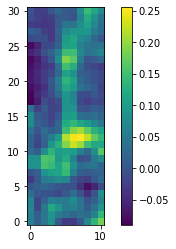

In [6]:
# show slice of data
plt.imshow(slice)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

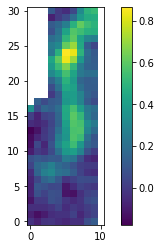

In [7]:
plt.imshow(slice1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

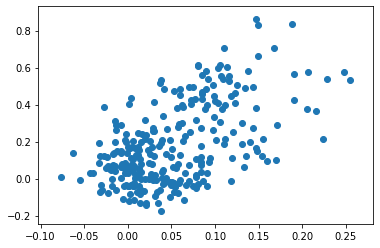

In [8]:
plt.scatter(slice.flatten(), slice1.flatten())

In [9]:
# reading the moment maps in a 2D array
ird_n2hp = fits.open('./../mom/cloudH-n2hp10-mom0.fits')[0]
ird_n2dp = fits.open('./../mom/cloudH-n2dp21-mom0.fits')[0]

In [10]:
ird_data = ird_n2hp.data
ird_data1 = ird_n2dp.data

In [11]:
ird_header = ird_n2hp.header
ird1_header = ird_n2dp.header

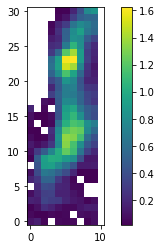

In [12]:
plt.imshow(ird_data)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

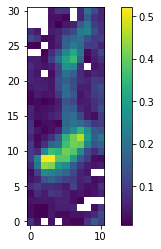

In [13]:
plt.imshow(ird_data1)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

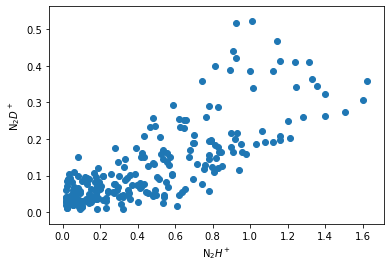

In [14]:
plt.scatter(ird_data.flatten(),ird_data1.flatten())
plt.xlabel('N$_2H^+$')
plt.ylabel('N$_2D^+$')
plt.show()

In [15]:
# loading cubes
cube_n2hp = spectral_cube.SpectralCube.read(hdu_n2hp)
cube_n2dp = spectral_cube.SpectralCube.read(hdu_n2dp)

In [16]:
cube_n2hp

SpectralCube with shape=(160, 31, 11) and unit=K:
 n_x:     11  type_x: RA---SFL  unit_x: deg    range:   284.267210 deg:  284.306128 deg
 n_y:     31  type_y: DEC--SFL  unit_y: deg    range:     2.092222 deg:    2.208889 deg
 n_s:    160  type_s: VRAD      unit_s: km / s  range:       33.024 km / s:      64.824 km / s

In [17]:
cube_n2dp

SpectralCube with shape=(160, 31, 11) and unit=K:
 n_x:     11  type_x: RA---SFL  unit_x: deg    range:   284.267210 deg:  284.306128 deg
 n_y:     31  type_y: DEC--SFL  unit_y: deg    range:     2.092222 deg:    2.208889 deg
 n_s:    160  type_s: VRAD      unit_s: km / s  range:       33.024 km / s:      64.824 km / s

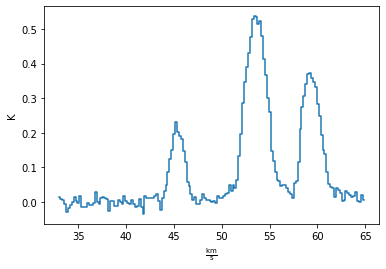

In [18]:
mean_spec_n2hp = cube_n2hp.mean(axis=(1,2))
# axis=(1,2) attributes the function to quicklook() keyword
spec_axis_n2hp = cube_n2hp.spectral_axis
# spectral_axis has been used to plot velocity on x axis
mean_spec_n2hp.quicklook()

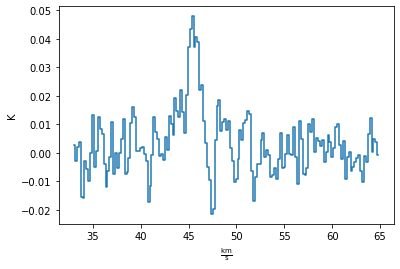

In [19]:
mean_spec_n2dp = cube_n2dp.mean(axis=(1,2))
spec_axis_n2dp = cube_n2dp.spectral_axis
mean_spec_n2dp.quicklook()

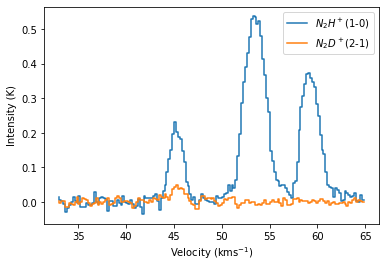

In [20]:
# comparing the mean spectrum for both the molecules
plt.plot(spec_axis_n2hp, mean_spec_n2hp, drawstyle='steps', label= '$N_2H^+$(1-0)')
plt.plot(spec_axis_n2dp, mean_spec_n2dp, drawstyle='steps', label= '$N_2D^+$(2-1)')
plt.legend(loc='best')
plt.xlabel('Velocity (kms$^{-1}$)')
plt.ylabel('Intensity (K)')
plt.savefig('./../figs/cloudH-meanspec.pdf')
plt.show()

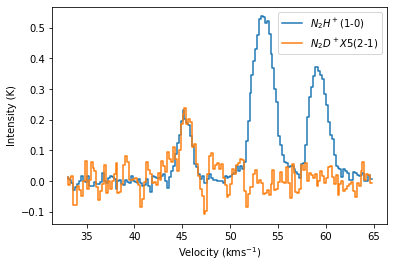

In [21]:
plt.plot(spec_axis_n2hp, mean_spec_n2hp, drawstyle='steps', label= '$N_2H^+$(1-0)')
plt.plot(spec_axis_n2dp, mean_spec_n2dp*5, drawstyle='steps', label= '$N_2D^+X5$(2-1)')
plt.legend(loc='best')
plt.xlabel('Velocity (kms$^{-1}$)')
plt.ylabel('Intensity (K)')
plt.savefig('./../figs/cloudH-meanspec_factor5.pdf')
plt.show()

INFO: Auto-setting vmin to -1.403e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.783e+00 [aplpy.core]


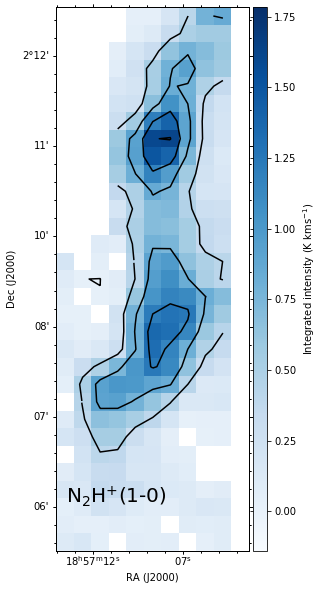

In [22]:
fig = plt.figure(figsize=(10,10))
ax = aplpy.FITSFigure(ird_n2hp, figure=fig)
ax.show_contour(ird_n2hp, levels=5, colors='black')
ax.show_colorscale(cmap='Blues')
ax.ticks.set_xspacing(0.02)
ax.ticks.set_yspacing(0.02)
ax.add_colorbar()
ax.add_label(0.05, 0.1, 'N$_2$H$^{+}$(1-0)', relative=True, fontsize=20, ha='left')
ax.colorbar.set_axis_label_text(r'Integrated intensity (K kms$^{-1}$)')
fig.savefig('./../figs/cloudH-n2hp10-mom0.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -4.134e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.736e-01 [aplpy.core]


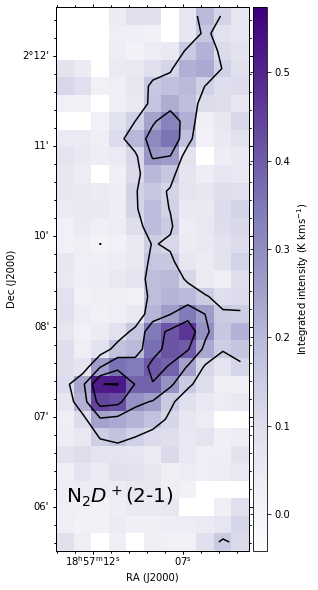

In [23]:
fig = plt.figure(figsize=(10,10))
ax = aplpy.FITSFigure(ird_n2dp, figure=fig)
ax.show_contour(ird_n2dp, levels=5, colors='black')
ax.show_colorscale(cmap='Purples')
ax.ticks.set_xspacing(0.02)
ax.ticks.set_yspacing(0.02)
ax.add_colorbar()
ax.add_label(0.05, 0.1, 'N$_2D^+$(2-1)', relative=True, fontsize=20, ha='left')
ax.colorbar.set_axis_label_text('Integrated intensity (K kms$^{-1}$)')
fig.savefig('./../figs/cloudH-n2dp21-mom0.pdf', bbox_inches='tight')

In [24]:
hdu_col = fits.open('./../hershcel/cloudH_cdens.fits')
hdu_temp = fits.open('./../hershcel/cloudH_temp.fits')

INFO: Auto-setting vmin to  7.891e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.909e+02 [aplpy.core]


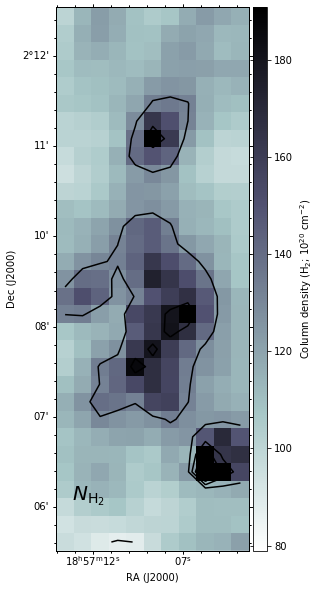

In [25]:
fig = plt.figure(figsize=(10,10))
ax = aplpy.FITSFigure(hdu_col, figure=fig)
ax.show_contour(hdu_col, levels=5, colors='black')
ax.show_colorscale(cmap='bone_r', pmax=98)
ax.ticks.set_xspacing(0.02)
ax.ticks.set_yspacing(0.02)
ax.add_colorbar()
ax.add_label(0.05, 0.1, ' $N_{\mathrm{H}_2}$', relative=True, fontsize=20, ha='left')
ax.colorbar.set_axis_label_text('Column density (H$_2$; $10^{20}$ cm$^{-2}$)')
fig.savefig('./../figs/cloudH-n2dp21-col.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to  1.875e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.044e+01 [aplpy.core]


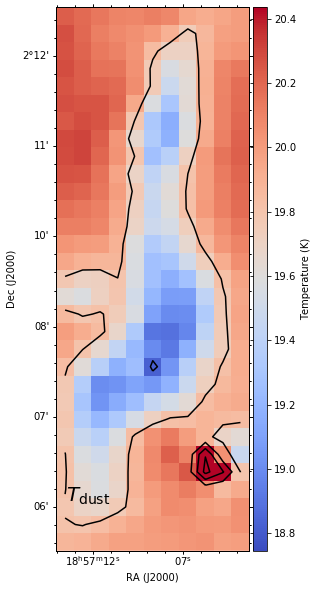

In [26]:
fig = plt.figure(figsize=(10,10))
ax = aplpy.FITSFigure(hdu_temp, figure=fig)
ax.show_contour(hdu_temp, levels=5, colors='black')
ax.show_colorscale(cmap='coolwarm', pmax=98)
ax.ticks.set_xspacing(0.02)
ax.ticks.set_yspacing(0.02)
ax.add_colorbar()
ax.add_label(0.05, 0.1, '$T_\mathrm{dust}$', relative=True, fontsize=20, ha='left')
ax.colorbar.set_axis_label_text('Temperature (K)')
fig.savefig('./../figs/cloudH-n2dp21-temp.pdf', bbox_inches='tight')

INFO: Auto-setting vmin to -2.307e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.202e+01 [aplpy.core]


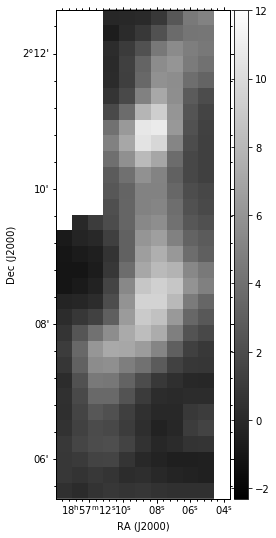

In [27]:
# creating moment maps
mom_n2hp = cube_n2hp.moment0()
mom_n2hp.quicklook()

INFO: Auto-setting vmin to -4.461e-01 [aplpy.core]
INFO: Auto-setting vmax to  8.678e-01 [aplpy.core]


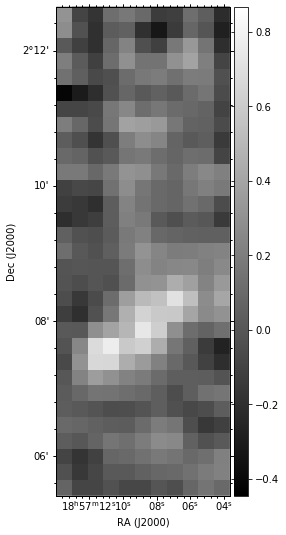

In [28]:
mom_n2dp = cube_n2dp.moment0()
mom_n2dp.quicklook()

In [29]:
mom_n2dp

<Projection [[ 7.15888944e-02, -8.93748928e-02, -8.70542065e-02,
              -2.48933922e-02, -7.84715777e-02, -7.93196555e-02,
              -4.99885597e-03, -4.14376104e-02,  8.16348073e-02,
               1.53928837e-01,  9.59889297e-02],
             [-3.04569861e-02, -1.57592063e-01, -8.43233304e-02,
               1.38602280e-02,  1.35527664e-02,  5.60229940e-02,
               8.51672829e-02,  1.01597778e-01,  1.40295609e-01,
               1.87333102e-01,  2.16413708e-01],
             [-9.26563279e-02, -1.77124819e-01, -1.02685915e-01,
               7.95408604e-02,  9.82165176e-02,  1.40411066e-01,
               1.84299769e-01,  1.49862188e-01,  9.48547332e-02,
               1.25152313e-01,  2.13043955e-01],
             [ 3.42192706e-02,  3.89783336e-03,  7.07896579e-02,
               1.58978995e-01,  1.27705199e-01,  1.92133379e-01,
               2.68833455e-01,  2.55200042e-01,  5.60060393e-02,
              -2.71004691e-02,  1.39386100e-02],
             [ 9.5999540

In [30]:
std = np.std(mom_n2dp)
std

<Projection 0.18921422 K km / s>

In [31]:
rms = 3.2*std
rms

<Projection 0.6054855 K km / s>

In [32]:
# masking the array
mom_n2dp_mask = np.where(mom_n2dp >= std, mom_n2dp, np.nan)

In [33]:
# mom_n2dp_mask.quicklook()
hdut = fits.PrimaryHDU(mom_n2dp_mask)
hdut.writeto('masked_n2dp.fits', clobber=True)

In [34]:
mom_n2hp

<Projection [[ 0.41280113,  0.14537666,  0.56926937,  0.77496102,
               0.6478921 ,  0.75586653,  0.51295029,  0.4749597 ,
               0.41889807,  0.38319225,         nan],
             [ 0.80463741,  0.60372413,  0.83433853,  0.64625383,
               0.26541994,  0.27247458,  0.03623314, -0.24745052,
              -0.39184781, -0.42204459,         nan],
             [ 0.816077  ,  0.97182701,  1.48353477,  1.54099635,
               0.62336415,  0.03344802, -0.32918554, -0.5232442 ,
              -0.52038567, -0.50516541,         nan],
             [ 0.87897526,  1.58923952,  1.95539154,  2.10023492,
               1.45559886,  0.54522209, -0.1010284 ,  0.11196372,
               0.56167041,  0.68255398,         nan],
             [ 0.54149465,  1.33793901,  1.9203916 ,  1.72413219,
               1.11162295,  0.31719359, -0.35614781, -0.07623673,
               1.08260859,  1.47365471,         nan],
             [ 0.36782087,  1.54397735,  2.59734715,  2.18040041,
    

In [35]:
std_n2hp = np.std(mom_n2hp)
std_n2hp

<Projection nan K km / s>

In [36]:
mom_n2hp_mask = np.where(mom_n2hp >= 11.5*std, mom_n2hp, np.nan)

INFO: Auto-setting vmin to  1.321e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.174e+01 [aplpy.core]


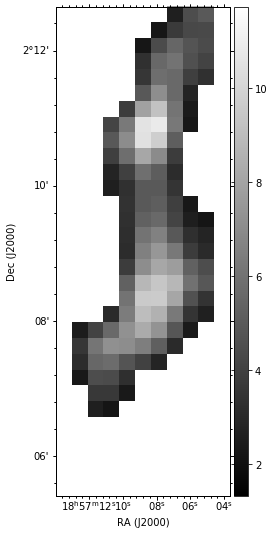

In [37]:
mom_n2hp_mask.quicklook()

In [38]:
hdu = fits.PrimaryHDU(mom_n2hp_mask)
hdu.writeto('./../rms/masked_n2hp.fits', clobber=True)

In [41]:
# Deuterium fraction determination
cd_n2hp = fits.open('./../rms/masked_n2hp.fits')[0]
cd_n2dp = fits.open('./../rms/masked_n2dp.fits')[0]

In [42]:
data_h = cd_n2hp.data
data_d = cd_n2dp.data

In [45]:
d_frac = data_d/data_h


In [46]:
new_hdu_dfrac = fits.PrimaryHDU(d_frac, cd_n2dp.header)
new_hdu_dfrac.writeto('./../rms/d_frac.fits', overwrite = True)

In [47]:
dfrac = fits.open('./../rms/d_frac.fits')[0]

In [48]:
dfrac_data = dfrac.data

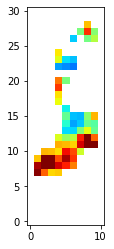

In [57]:
plt.imshow(d_frac, origin='bottom', vmin=0.0, vmax=0.1, cmap='jet')

In [58]:
cdens = fits.open('./../hershcel/cloudH_cdens.fits')[0]
temp = fits.open('./../hershcel/cloudH_temp.fits')[0]

In [59]:
data_cdens = cdens.data
data_temp = temp.data

Text(0, 0.5, 'D_frac')

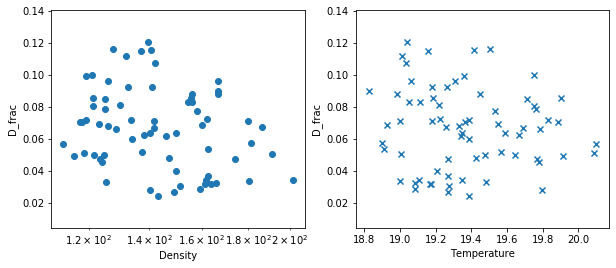

In [60]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.scatter(data_cdens, dfrac_data, marker='o')
ax2.scatter(data_temp, dfrac_data, marker='x')
ax.set_xscale('log')
ax.set_xlabel('Density')
ax2.set_xlabel('Temperature')
ax.set_ylabel('D_frac')
ax2.set_ylabel('D_frac')


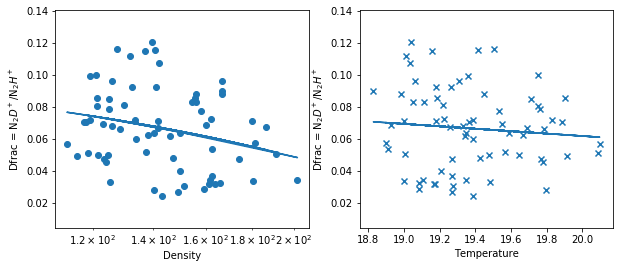

In [70]:
from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B


ids_dfrac = np.where(~np.isnan(dfrac_data.flatten()))
array_dfrac = dfrac_data.flatten()[ids_dfrac]
array_cdens = data_cdens.flatten()[ids_dfrac]
array_temp = data_temp.flatten()[ids_dfrac]

popt_cdens, _ = curve_fit(f, array_cdens, array_dfrac) # your data x, y to fit
popt_temp, _ = curve_fit(f, array_temp, array_dfrac) # your data x, y to fit


fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.scatter(data_cdens, dfrac_data, marker='o')
ax.plot(array_cdens, f(array_cdens, *popt_cdens))

ax2.scatter(data_temp, dfrac_data, marker='x')
ax2.plot(array_temp, f(array_temp, *popt_temp))


ax.set_xscale('log')
ax.set_xlabel('Density')
ax.set_ylabel('Dfrac = N$_2D^+$/N$_2H^+$')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Dfrac = N$_2D^+$/N$_2H^+$')
fig.savefig('./../figs/dfrac.pdf', bbox_inches='tight')

In [71]:
# Column density calculation N_tot
T_ex=4.5
T_bg=2.72548

A_n2hp = 10**(-4.44034)
B_n2hp = 46586.87e6
frequency_n2hp = 93176.25e6
l=0.0
u=1.0

A_n2dp = 10**(-3.22738)
B_n2dp = 38554.74e6
frequency_n2dp = 154217.18e6
l=1.0
u=2.0

g_l = (2*l) + 1
g_u = (2*u) + 1

In [74]:
# N_2H+
J1 = 1
J0 = 0
h = 6.626e-34
k = 1.38e-23
Qrot_tot = 0
for J in range (0,20):
    EJ = J*(J+1)*h*B_n2hp
    Qrot = (2*J+1)*np.exp(-EJ/(k*T_ex))
    Qrot_tot += Qrot
    print(Qrot_tot)

1.0
3.999997017541573
8.999982105264264
15.999940350950062
24.99985087759753
35.99968684352558
48.99941544250689
63.99899790393096
80.99838949299689
99.99753951093564
120.99639129526213
143.99488222005684
168.9929436962771
195.99050117209808
224.9874741332832
255.98377610358446
288.9793146451722
323.97399135909467
360.96770188576687
399.9603359054894


In [79]:
wl = (3*10**(8))/(93176.25e6)
Jv_Tex = (h*frequency_n2hp/k)/np.exp(h*frequency_n2hp/(k*T_ex))-1
print(Jv_Tex)

0.6554293399097424


In [80]:
Jv_Tbg = (h*frequency_n2hp/k)/np.exp(h*frequency_n2hp/(k*T_bg))-1
print(Jv_Tbg)

-0.13345016358275819


In [84]:
A = 1/(Jv_Tex-Jv_Tbg)
B = 1/(1-np.exp(-h*frequency_n2hp/(k*T_ex)))
C = Qrot_tot/(np.exp(-0.0/(k*T_ex)))
print(A,B,C)

1.267620714662802 1.587368888772169 399.9603359054894


In [85]:
D = (8*math.pi)/(wl**(3)*10**(-4.44034))
print(D)

20755432073204.312


In [87]:
Ntot = D*(g_l/g_u)*A*B*C
print(Ntot)

1.0022294157148308e+16
